## Analysing Data

In [1]:
import pandas as pd

df = pd.read_csv("Financials_10K.csv")
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Net Cash from Operations
0,Microsoft,2024,245122,88136,512163,243686,118548
1,Microsoft,2023,211915,72361,411976,205753,87582
2,Microsoft,2022,198270,72738,364840,198298,89035
3,Tesla,2024,96773,14974,122070,48390,13256
4,Tesla,2023,81462,12587,106618,43009,14724
5,Tesla,2022,53823,5644,82338,36440,11497
6,Apple,2024,391035,93736,364980,308030,118254
7,Apple,2023,383285,96995,352583,290437,110543
8,Apple,2022,394328,99803,352755,302083,122151


In [4]:
df = df.sort_values(by=['Company', 'Fiscal Year'])
df.head()

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Net Cash from Operations
8,Apple,2022,394328,99803,352755,302083,122151
7,Apple,2023,383285,96995,352583,290437,110543
6,Apple,2024,391035,93736,364980,308030,118254
2,Microsoft,2022,198270,72738,364840,198298,89035
1,Microsoft,2023,211915,72361,411976,205753,87582


### Analyzing trends
#### Calculating YoY Growth (%)

In [6]:
# Revenue Growth
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100

# Net Income Growth
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100

# Asset Growth
df['Asset Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100

# Liability Growth
df['Liability Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100

# Cash Flow Growth
df['Cash Flow Growth (%)'] = df.groupby('Company')['Net Cash from Operations'].pct_change() * 100


#### Analyze Financial Health Indicators

In [7]:
# Debt to Asset Ratio
df['Debt-to-Asset Ratio'] = df['Total Liabilities'] / df['Total Assets']

# Net Margin
df['Net Margin (%)'] = (df['Net Income'] / df['Total Revenue']) * 100


### summaring the findings for each company

In [18]:
summary = df.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean'
}).reset_index()

print("\nYear-over-Year Average Growth Rates (%):")
print(summary)


Year-over-Year Average Growth Rates (%):
     Company  Revenue Growth (%)  Net Income Growth (%)
0      Apple           -0.389233              -3.086755
1  Microsoft           11.275996              10.641059
2      Tesla           35.073460              70.989801


## Plots

### Total Revenue Over Time

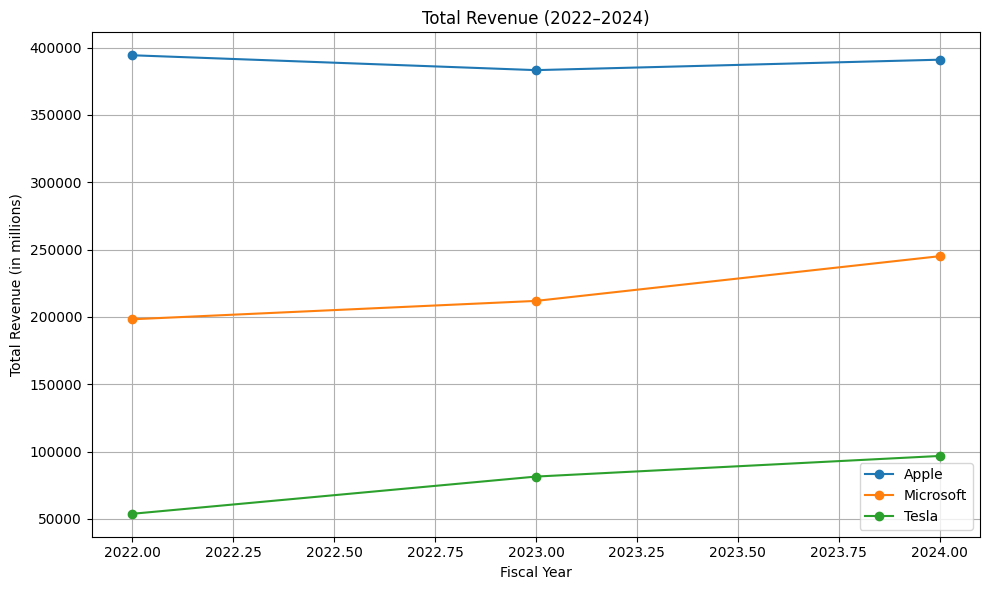

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Fiscal Year'], subset['Total Revenue'], label=company, marker='o')

plt.title('Total Revenue (2022–2024)')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Revenue (in millions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Net Income Over Time

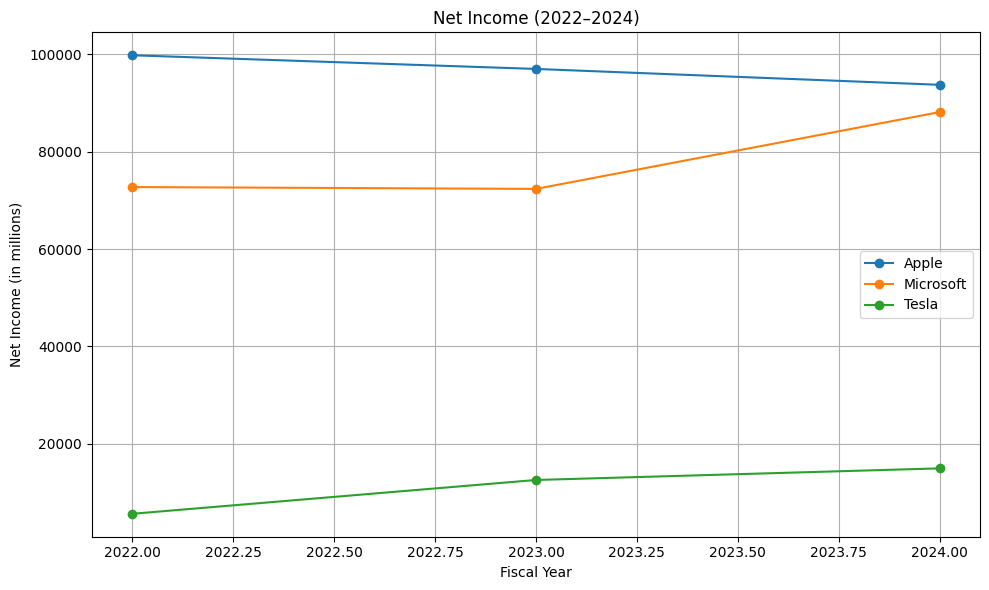

In [9]:
plt.figure(figsize=(10, 6))
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Fiscal Year'], subset['Net Income'], label=company, marker='o')

plt.title('Net Income (2022–2024)')
plt.xlabel('Fiscal Year')
plt.ylabel('Net Income (in millions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Assets vs. Liabilities

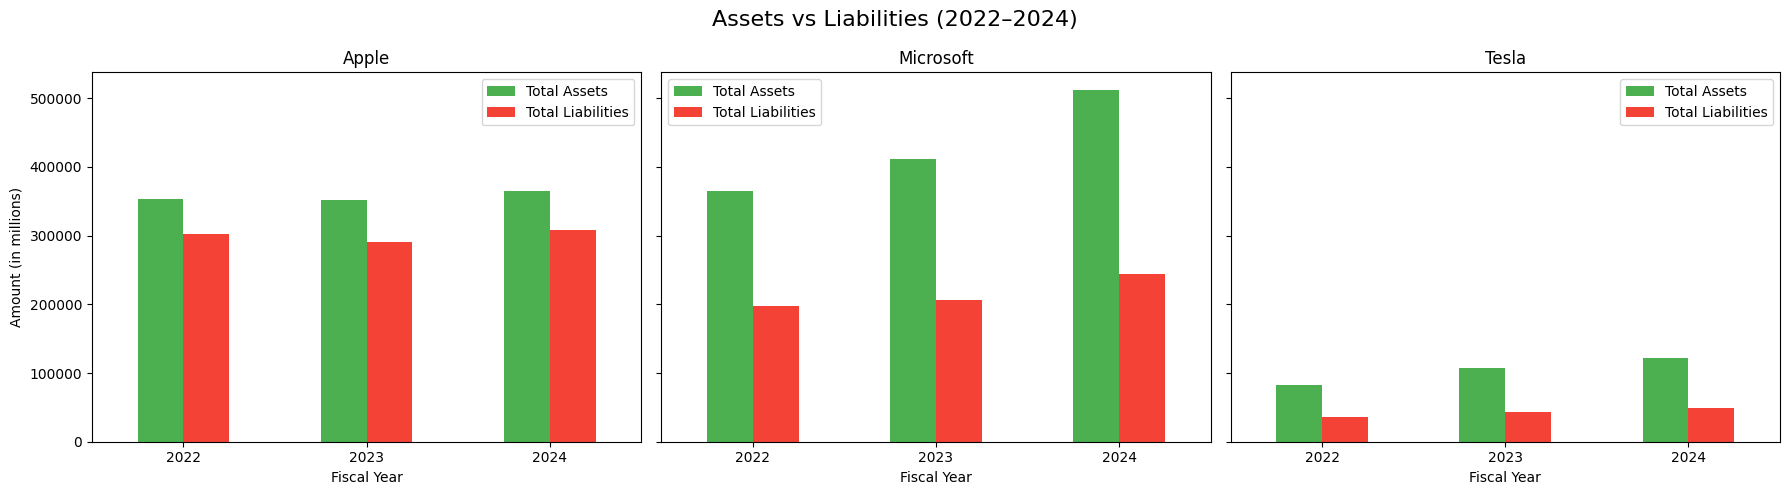

In [12]:
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
companies = df['Company'].unique()

for i, company in enumerate(companies):
    subset = df[df['Company'] == company]
    subset.plot(
        x='Fiscal Year',
        y=['Total Assets', 'Total Liabilities'],
        kind='bar',
        ax=ax[i],
        title=company,
        rot=0,
        color=['#4caf50', '#f44336']
    )
    ax[i].set_ylabel('Amount (in millions)')

plt.suptitle('Assets vs Liabilities (2022–2024)', fontsize=16)
plt.tight_layout()
plt.show()


### Operating Cash Flow

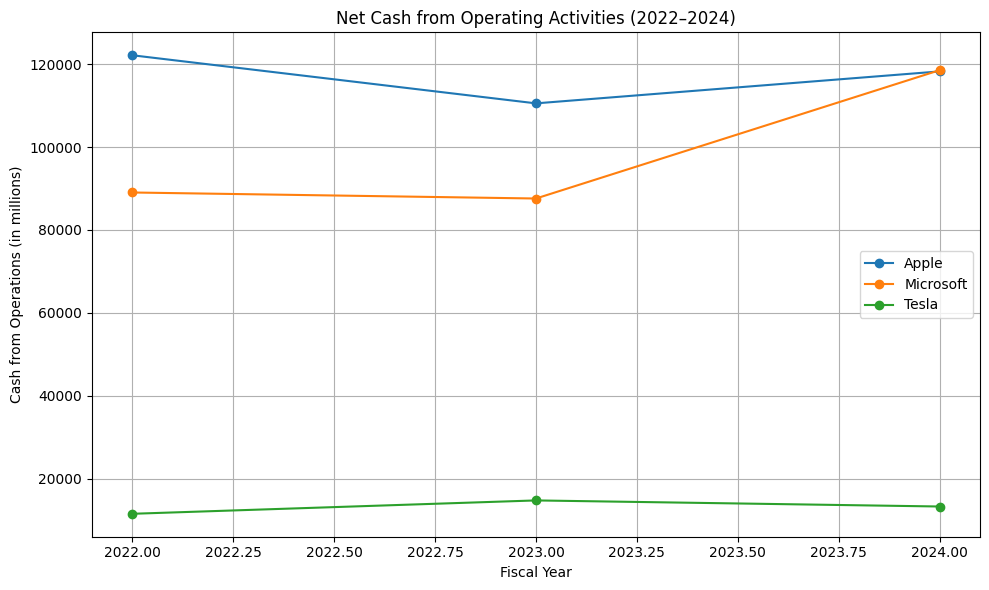

In [13]:
plt.figure(figsize=(10, 6))
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Fiscal Year'], subset['Net Cash from Operations'], label=company, marker='o')

plt.title('Net Cash from Operating Activities (2022–2024)')
plt.xlabel('Fiscal Year')
plt.ylabel('Cash from Operations (in millions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

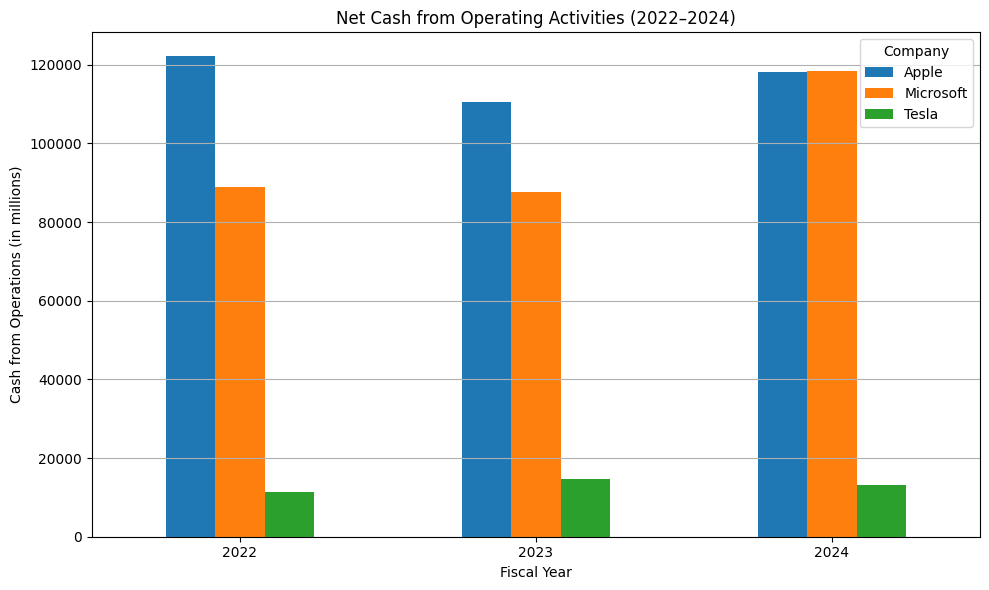

In [15]:
plt.figure(figsize=(10, 6))

# Pivot the data to make it easier to plot
pivot_cash = df.pivot(index='Fiscal Year', columns='Company', values='Net Cash from Operations')
pivot_cash.plot(kind='bar', figsize=(10,6))

plt.title('Net Cash from Operating Activities (2022–2024)')
plt.xlabel('Fiscal Year')
plt.ylabel('Cash from Operations (in millions)')
plt.xticks(rotation=0)
plt.legend(title='Company')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Growth Rates

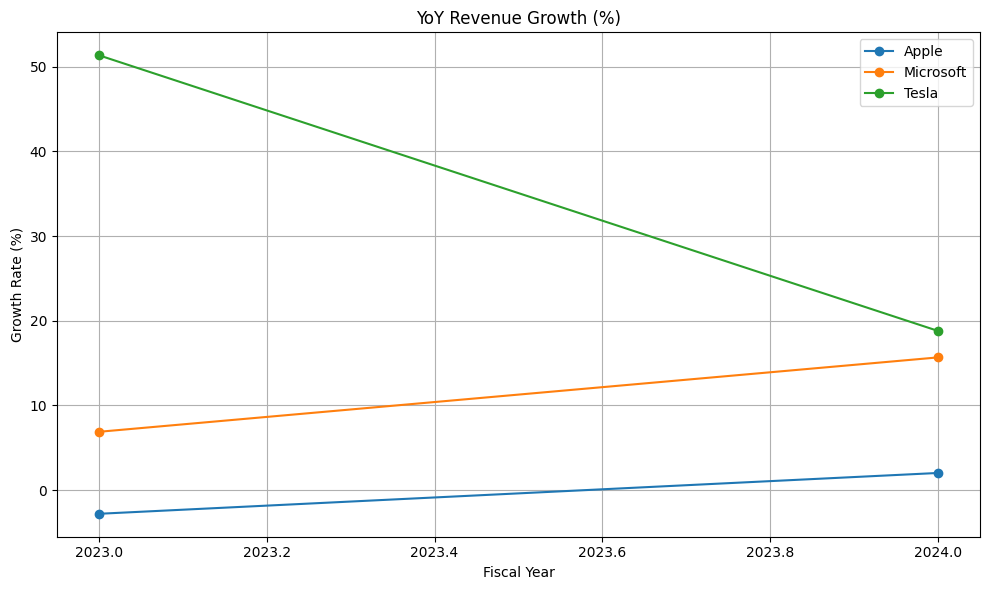

In [14]:
# Revenue Growth Comparison
plt.figure(figsize=(10, 6))
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Fiscal Year'], subset['Revenue Growth (%)'], label=company, marker='o')

plt.title('YoY Revenue Growth (%)')
plt.xlabel('Fiscal Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

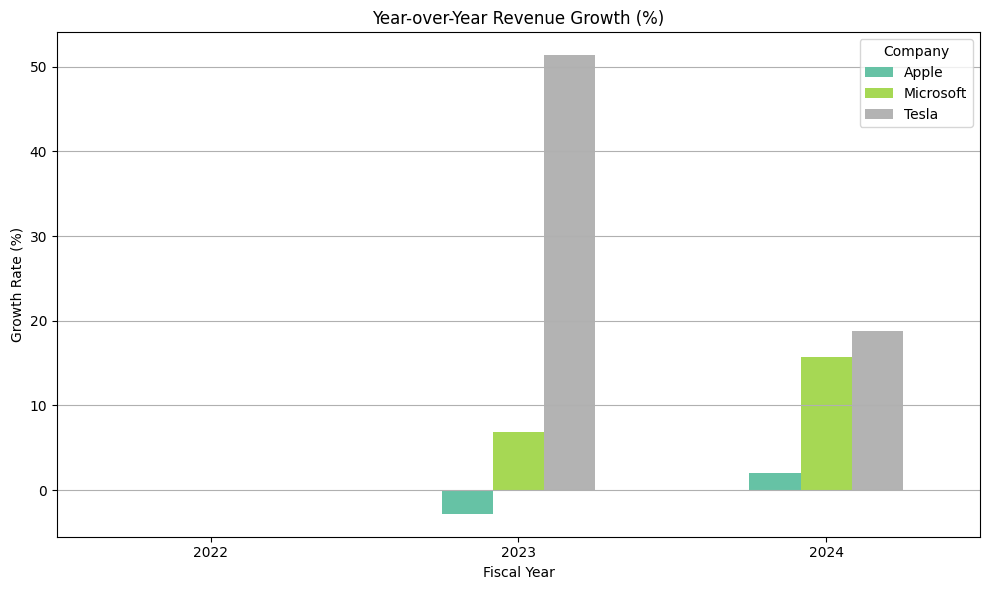

In [16]:
plt.figure(figsize=(10, 6))

# Pivot for bar chart
pivot_growth = df.pivot(index='Fiscal Year', columns='Company', values='Revenue Growth (%)')
pivot_growth.plot(kind='bar', figsize=(10,6), colormap='Set2')

plt.title('Year-over-Year Revenue Growth (%)')
plt.xlabel('Fiscal Year')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Company')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 📊 Summary of Financial Trends and Insights (2022–2024)

This section summarizes key financial trends observed in the 10-K data for Microsoft, Tesla, and Apple over the fiscal years 2022 to 2024. The analysis highlights revenue growth, profitability, asset and liability trends, and operating cash flow changes.



### 🏢 Microsoft Corporation
- **Revenue Growth:** Steady growth from $198.3B (2022) to $245.1B (2024), reflecting strong product and cloud service expansion.
- **Net Income:** Significant jump in 2024 to $88.1B, suggesting improved margins or cost efficiency.
- **Assets vs. Liabilities:** Assets grew by 40% over 3 years; liabilities increased moderately. Strong balance sheet position.
- **Cash Flow:** High and growing net cash from operations, showing robust cash-generating ability.

### ⚡ Tesla, Inc.
- **Revenue Growth:** Rapid growth from $53.8B (2022) to $96.8B (2024), indicating strong demand and delivery expansion.
- **Net Income:** Increased more than 2.5x in 3 years, suggesting operational efficiency improvements.
- **Liabilities:** Growth in liabilities is controlled compared to assets, maintaining a healthy leverage ratio.
- **Cash Flow:** Cash from operations is steady, though slightly down in 2024. Could point to changes in working capital or investment activity.

### 🍏 Apple Inc.
- **Revenue Trend:** Slight fluctuations, with a dip in 2023 and recovery in 2024.
- **Net Income:** Slight decline over 3 years, despite stable revenues—may be due to cost increases or narrowing margins.
- **Balance Sheet:** Total assets remained fairly stable; liabilities have increased slightly, which could affect long-term leverage.
- **Cash Flow:** Strong operating cash flows throughout, although slightly down from 2022, indicating consistent business fundamentals.


### 🔍 Cross-Company Observations
- Microsoft and Tesla show the strongest **growth momentum**, while Apple remains highly **stable** with consistent performance.
- Tesla is in a **scaling phase**, with rapidly increasing revenues and net income.
- Microsoft leads in **profitability and cash generation**, showcasing mature business execution.
- Apple maintains **solid fundamentals** but shows slight dips in profit, possibly due to market saturation or macroeconomic factors.

### 📌 Final Thoughts
These insights can inform how we train the AI chatbot—emphasizing not just raw numbers but also the **story behind the data**, such as growth trajectory, stability, and financial health. This narrative capability is crucial for an AI system aimed at explaining financial performance conversationally.